**GROUP MEMBERS:**

Asad Karim -- 226063 


Shweta Pandey -- 225964 


Uzain Jabbar -- 220658 




# # Assignment 2

## An MLP training script using tf.data

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

5


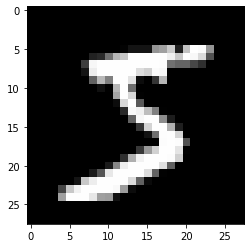

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# Iterating through the data
for img, lbl in train_data:
    print(lbl.numpy())
    plt.imshow(img.numpy(), cmap="Greys_r")
    plt.show()
    input()


In [0]:
train_data = tf.data.Dataset.range(100)
train_data = train_data.shuffle(1000)
train_data = train_data.repeat()
train_data = train_data.batch(20)


iterator   = train_data.make_one_shot_iterator()
next_batch = iterator.get_next()

with tf.compat.v1.Session() as sess:
    for i in range(15):
        if i % (10//2) == 0:
            print("------------")
        print(sess.run("{:02d}:".format(i), next_batch.eval()))

AttributeError: ignored

If we change the order of the above three operations,we will get different results. If the repeat operation is applied before shuffle opeartion,certain elements/images will be repeated before other elements appear even once. Also, all samples might not be processed in one epoch.
If the shuffle operation is applied before the repeat operation, then performance might slow down at the beginning of each epoch.

Best Order:

For batches to be different in each epoch, we should shuffle first, then repeat, and finally batch because all batches are unique.

In [0]:
# normalize the images to [0, 1]  and reshape images from (28, 28) to (784,) and convert labels to int32

train_images = (train_images.astype(np.float32) / 255.).reshape((-1, 784))
test_images = (test_images.astype(np.float32) / 255.).reshape((-1, 784))

train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.batch(128)

# print the shapes

for img_batch, lbl_batch in train_data:
    print(img_batch.shape, lbl_batch.shape)
    
   

In [0]:
train_steps = 1000
learning_rate = 0.1

n_input = 784
h1 = 512
h2 = 128
n_classes = 10

# weights and bias initializations
W1 = tf.Variable(tf.random.uniform(shape = (n_input,h1), minval = -(math.sqrt(6)/math.sqrt(n_input+h1)),  
                            maxval = (math.sqrt(6)/math.sqrt(n_input+h1)))) # Xavier uniform
W2 = tf.Variable(tf.random.uniform(shape = (h1,h2), minval = -(math.sqrt(6)/math.sqrt(h1+h2)),
                             maxval = (math.sqrt(6)/math.sqrt(h1+h2)))) 
out = tf.Variable(tf.random.uniform(shape = (h2,n_classes), minval = -(math.sqrt(6/(h2+n_classes))),
                                   maxval = math.sqrt(6/(h2+n_classes)) ))

b1 = tf.Variable(tf.random.uniform([h1]))
b2 = tf.Variable(tf.random.uniform([h2]))
b_out = tf.Variable(tf.random.uniform([n_classes]))


In [0]:

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
   
    with tf.GradientTape() as tape:
        logit1 = tf.nn.relu(tf.matmul(img_batch, W1) + b1)
        logit2 = tf.nn.relu(tf.matmul(logit1, W2) + b2)
        output = tf.matmul(logit2,out) + b_out
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=output, labels=lbl_batch))
    grads = tape.gradient(xent, [W1, b1, W2, b2, out, b_out])    
    
    W1.assign_sub(learning_rate * grads[0])
    b1.assign_sub(learning_rate * grads[1])
    W2.assign_sub(learning_rate * grads[2])
    b2.assign_sub(learning_rate * grads[3])
    out.assign_sub(learning_rate * grads[4])
    b_out.assign_sub(learning_rate * grads[5])

        
    if not step % 100:
        preds = tf.argmax(output, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

In [0]:
test_preds1 = tf.matmul(data.test_data, W1) + b1
test_preds2 = tf.matmul(test_preds1, W2) + b2
test_preds3 = tf.argmax(tf.matmul(test_preds2, out) + b_out, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds3, data.test_labels),
                             tf.float32))
print(acc)

## Fail 1


In [0]:
import tensorflow as tf

from datasets import MNISTDataset
from time import time
import os

# get the data
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))


# define the model first, from input to output

# this is a super deep model, cool!
n_units = 100
n_layers = 8
w_range = 0.4

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))


# Adding tf.board writer 
import time
logdir = os.path.join("logs", "fail_one" + str(time.time()))
fail1_train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
fail1_test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))


# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))

lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    # Change 2
    with fail1_train_writer.as_default():
      tf.summary.scalar("loss", xent, step=step)
      tf.summary.histogram("logits", out, step=step)
      tf.summary.histogram("weights", var, step=step)



    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

        with fail1_train_writer.as_default():
            tf.summary.scalar("accuracy", acc, step=step)
            tf.summary.image("input", tf.reshape(img_batch, [-1, 28, 28, 1]), step=step)


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(test_acc))

with fail1_test_writer.as_default():
            tf.summary.scalar("accuracy", test_acc, step=step)



In [0]:
# then load/run tensorboard

%load_ext tensorboard

In [0]:
%tensorboard --logdir logs

## Fail 2

In [0]:
import tensorflow as tf

from datasets import MNISTDataset
from time import time


# get the data
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))


# define the model first, from input to output

# this is a super deep model, cool!
n_units = 100
n_layers = 8
w_range = 0.1

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.sigmoid,
        kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range),
        bias_initializer=tf.initializers.constant(0.001)))
    
# Adding tf.board writer 
import time
logdir = os.path.join("logs", "fail_two" + str(time.time()))
fail2_train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
fail2_test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))

# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-w_range,
                                                         maxval=w_range)))

lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)
    # Change 2
    with fail2_train_writer.as_default():
      tf.summary.scalar("loss", xent, step=step)
      tf.summary.histogram("logits", out, step=step)
      tf.summary.histogram("weights", var, step=step)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))


        with fail2_train_writer.as_default():
          tf.summary.scalar("accuracy", acc, step=step)
          tf.summary.image("input", tf.reshape(img_batch, [-1, 28, 28, 1]), step=step)


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(test_acc))

with fail2_test_writer.as_default():
            tf.summary.scalar("accuracy", test_acc, step=step)




In [0]:
# then load/run tensorboard

%load_ext tensorboard

In [0]:
%tensorboard --logdir logs

## Fail 3

In [0]:
import tensorflow as tf

from datasets import MNISTDataset
from time import time


# get the data
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))


# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.),
        bias_initializer=tf.initializers.constant(0.001)))
    

# Adding tf.board writer 
import time
logdir = os.path.join("logs", "fail_three" + str(time.time()))
fail3_train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
fail3_test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))


# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))

lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)

    # Change 2
    with fail3_train_writer.as_default():
      tf.summary.scalar("loss", xent, step=step)
      tf.summary.histogram("logits", out, step=step)
      tf.summary.histogram("weights", var, step=step)



    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))


        with fail3_train_writer.as_default():
          tf.summary.scalar("accuracy", acc, step=step)
          tf.summary.image("input", tf.reshape(img_batch, [-1, 28, 28, 1]), step=step)


out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(test_acc))

with fail2_test_writer.as_default():
            tf.summary.scalar("accuracy", test_acc, step=step)


In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir logs

## Fail 4

In [0]:
import tensorflow as tf

from datasets import MNISTDataset
from time import time


# get the data
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))


# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))

# Adding tf.board writer 
import time
logdir = os.path.join("logs", "fail_four" + str(time.time()))
fail4_train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
fail4_test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))


# finally add the output layer
layers.append(tf.keras.layers.Dense(
    10, kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01)))

lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    # I hear adding random noise to inputs helps with generalization!
    img_batch = img_batch + tf.random.normal(tf.shape(img_batch), stddev=4)
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)
# Change 2
    with fail4_train_writer.as_default():
      tf.summary.scalar("loss", xent, step=step)
      tf.summary.histogram("logits", out, step=step)
      tf.summary.histogram("weights", var, step=step)

    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

        with fail2_train_writer.as_default():
          tf.summary.scalar("accuracy", acc, step=step)
          tf.summary.image("input", tf.reshape(img_batch, [-1, 28, 28, 1]), step=step)



out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(acc))


In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir logs

## Fail 5

In [0]:
import tensorflow as tf

from datasets import MNISTDataset
from time import time


# get the data
(train_imgs, train_lbls), (test_imgs, test_lbls) = tf.keras.datasets.mnist.load_data()
mnist = MNISTDataset(train_imgs.reshape((-1, 784)), train_lbls,
                     test_imgs.reshape((-1, 784)), test_lbls,
                     batch_size=256, seed=int(time()))


# define the model first, from input to output

# let's use fewer layers...
n_units = 100
n_layers = 2

# just set up a "chain" of hidden layers
layers = []
for layer in range(n_layers):
    layers.append(tf.keras.layers.Dense(
        n_units, activation=tf.nn.relu,
        kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                         maxval=0.01),
        bias_initializer=tf.initializers.constant(0.001)))
# Adding tf.board writer 
import time
logdir = os.path.join("logs", "fail_five" + str(time.time()))
fail5_train_writer = tf.summary.create_file_writer(os.path.join(logdir, "train"))
fail5_test_writer = tf.summary.create_file_writer(os.path.join(logdir, "test"))

# finally add the softmax output layer :))
layers.append(tf.keras.layers.Dense(
    10, activation=tf.nn.softmax,
    kernel_initializer=tf.initializers.RandomUniform(minval=-0.01,
                                                     maxval=0.01)))

lr = 0.1
for step in range(2000):
    img_batch, lbl_batch = mnist.next_batch()
    with tf.GradientTape() as tape:
        # here we just run all the layers in sequence via a for-loop
        out = img_batch
        for layer in layers:
            out = layer(out)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out, labels=lbl_batch))

    weights = [var for l in layers for var in l.trainable_variables]
    grads = tape.gradient(xent, weights)
    for grad, var in zip(grads, weights):
        var.assign_sub(lr*grad)
# Change 2
    with fail5_train_writer.as_default():
      tf.summary.scalar("loss", xent, step=step)
      tf.summary.histogram("logits", out, step=step)
      tf.summary.histogram("weights", var, step=step)


    if not step % 100:
        preds = tf.argmax(out, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

        with fail5_train_writer.as_default():
          tf.summary.scalar("accuracy", acc, step=step)
          tf.summary.image("input", tf.reshape(img_batch, [-1, 28, 28, 1]), step=step)



out = mnist.test_data
for layer in layers:
    out = layer(out)
test_preds = tf.argmax(out, axis=1, output_type=tf.int32)
test_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, mnist.test_labels), tf.float32))
print("Final test accuracy: {}".format(test_acc))

with fail5_test_writer.as_default():
            tf.summary.scalar("accuracy", test_acc, step=step)


In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir logs